In [1]:
import xarray as xr
import numpy as np

In [2]:
time = xr.DataArray(
    np.arange(2 * 365) * np.timedelta64(1, "D") + np.datetime64("2001-01-01"),
    dims=("time", ),
)
data = xr.DataArray(
    10 * np.sin((time - np.datetime64("2001-01-01")) / 365 / np.timedelta64(1, "D") * 2 * np.pi)
    + np.random.normal(size=(2 * 365, )),
    dims=("time", ),
    coords={"time": time},
)
data

/tmp/ipykernel_1972/3785530334.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(


<xarray.DataArray (time: 730)>
array([ -0.67906336,  -0.9904431 ,   1.14422608,  -0.31900261,
        -0.44679684,   0.71610474,   1.39872553,   1.2068349 ,
         1.56085711,   0.1691189 ,   3.11761359,   2.33888903,
         1.45385736,   1.3048317 ,   3.20836743,   2.32583965,
         2.16076922,   2.70815008,   2.25869298,   4.00394853,
         5.91588749,   4.182655  ,   5.22119188,   4.84400041,
         5.01787563,   4.1747482 ,   5.80950784,   4.58574028,
         5.58773059,   4.8594734 ,   4.35462001,   3.27096994,
         4.89482293,   6.29336045,   5.198422  ,   5.47513575,
         5.45649527,   5.29952084,   6.28294882,   5.42664182,
         5.96976724,   6.33579746,   5.21829701,   6.6287166 ,
         5.7212747 ,   6.24704371,   6.47683096,   8.78129537,
         7.84158735,   7.58591644,   8.06329161,   7.58421159,
         8.3835356 ,   6.23335707,   6.78213587,   6.95324636,
         9.16026403,   8.80060987,   8.55438714,   7.95704043,
         8.25415829,   8.20134562,   9.03197005,   7.95640704,
        10.49023117,   7.81832571,   9.34102223,   8.81131342,
         7.83882082,   6.65985676,  11.83905666,   8.87057408,
         9.16143298,   7.88068601,   9.95091168,   8.42524403,
         8.86289169,  10.12838235,   8.6614729 ,   9.67724724,
...
       -10.42473743, -10.07731986,  -8.27184514,  -9.5059534 ,
        -7.576485  ,  -8.64365423, -10.63163033,  -9.55710895,
        -9.3232156 ,  -9.55238863,  -9.93003792,  -9.68200539,
        -7.53092419,  -9.68180283,  -6.97608558,  -8.24320061,
        -9.62476728,  -9.99127647,  -7.96603986,  -8.63837914,
        -7.98314063,  -8.00608888,  -8.30049111,  -7.83501429,
        -9.55888367,  -8.49685409,  -6.99023766,  -6.08426325,
        -8.13088139,  -5.89544358,  -6.55189534,  -6.88956413,
        -6.90871027,  -4.98983349,  -7.38014362,  -5.97729821,
        -6.88426675,  -5.26909624,  -5.53904613,  -7.35354077,
        -6.87553664,  -7.60306214,  -5.58075559,  -4.89065511,
        -5.801871  ,  -4.87455342,  -5.02977891,  -4.94573861,
        -4.20532745,  -6.00786027,  -4.19124121,  -4.54319179,
        -3.91863251,  -3.18990442,  -3.71925013,  -3.04232332,
        -3.29605925,  -3.68995504,  -3.822326  ,  -4.32035199,
        -3.30644587,  -2.99983217,  -0.49105668,  -2.59191528,
        -1.17435622,  -2.1402962 ,  -2.31659458,  -0.68543027,
        -1.52357746,  -1.18028433,  -1.44635472,   0.82683265,
        -0.05964165,   0.10846525,  -2.02508725,  -1.07042973,
        -0.33612686,  -1.4621967 ])
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2002-12-31

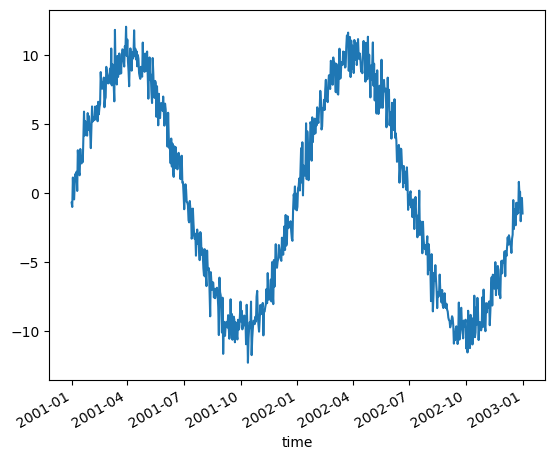

In [3]:
data.plot()

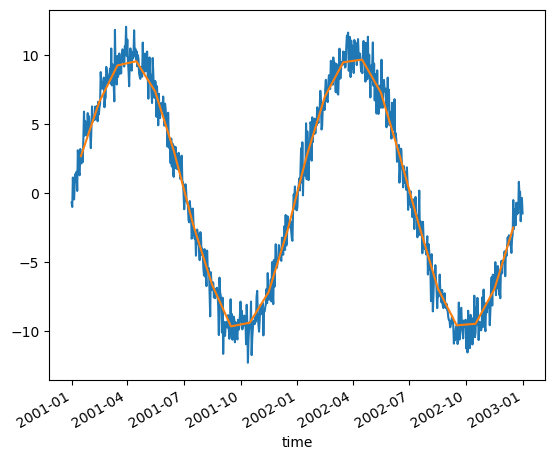

In [4]:
data.plot()
data.resample(time="1M").mean().assign_coords(
    time=data.time.resample(time="1M").mean()
).plot()

In [5]:
# data.plot()
data_clim = data.groupby("time.dayofyear").mean()
data_clim

<xarray.DataArray (dayofyear: 365)>
array([-8.30309467e-01, -3.06780535e-01,  8.22880766e-01,  3.77310782e-01,
       -1.22420465e-01,  1.20800595e+00,  2.33493490e+00,  9.93755896e-01,
        2.62844912e+00,  7.96564273e-03,  2.56508276e+00,  2.14469737e+00,
        1.37010482e+00,  1.43405454e+00,  4.13993904e+00,  1.67249354e+00,
        3.32363066e+00,  3.02273741e+00,  1.60425379e+00,  3.57380583e+00,
        4.21826805e+00,  4.66504753e+00,  5.11077815e+00,  3.60238558e+00,
        5.26071879e+00,  3.94174764e+00,  5.41264606e+00,  4.44611911e+00,
        5.49635675e+00,  4.59795561e+00,  4.77282475e+00,  4.09217883e+00,
        5.56148594e+00,  5.81246484e+00,  5.14753588e+00,  5.78362222e+00,
        5.78059693e+00,  6.36044167e+00,  6.51378669e+00,  5.02416490e+00,
        5.40699284e+00,  6.26174900e+00,  5.63437390e+00,  6.70091244e+00,
        5.87945268e+00,  6.88253615e+00,  7.34782254e+00,  7.74608888e+00,
        7.30259560e+00,  7.09477890e+00,  8.03700702e+00,  8.06619834e+00,
        8.08906682e+00,  6.89486673e+00,  8.18988801e+00,  8.19586592e+00,
        9.32352140e+00,  8.33244532e+00,  9.19712526e+00,  8.60996245e+00,
        8.85919857e+00,  8.30198799e+00,  8.17990518e+00,  8.66874174e+00,
        9.76204738e+00,  7.51920719e+00,  8.24650507e+00,  8.80190798e+00,
        9.15714966e+00,  7.48266780e+00,  1.00982187e+01,  9.17667323e+00,
        9.33716996e+00,  8.59008908e+00,  1.01115558e+01,  9.15655913e+00,
        9.54356000e+00,  9.61815182e+00,  8.91644851e+00,  1.01344038e+01,
...
       -9.70087725e+00, -9.01930349e+00, -8.67684759e+00, -9.65044629e+00,
       -9.55408795e+00, -1.02052490e+01, -9.39271958e+00, -9.28019696e+00,
       -9.51538972e+00, -9.43715697e+00, -9.48856155e+00, -7.50963563e+00,
       -8.37596794e+00, -7.89204729e+00, -8.88110896e+00, -9.82521875e+00,
       -9.59067332e+00, -8.03068353e+00, -8.69794036e+00, -8.14781528e+00,
       -8.09682770e+00, -8.12264971e+00, -9.06538099e+00, -9.05192799e+00,
       -8.53270293e+00, -7.62044490e+00, -7.05280314e+00, -7.53280299e+00,
       -6.92820355e+00, -6.16628276e+00, -7.06404912e+00, -7.31054276e+00,
       -6.09300337e+00, -7.28373141e+00, -6.11367343e+00, -7.36103908e+00,
       -5.13044844e+00, -6.41091368e+00, -7.69158582e+00, -5.85514375e+00,
       -7.18356420e+00, -5.29777702e+00, -4.28957097e+00, -5.57984221e+00,
       -5.13455174e+00, -4.99236016e+00, -4.85314505e+00, -3.97705041e+00,
       -5.04120035e+00, -4.40374542e+00, -4.63188858e+00, -4.40694287e+00,
       -3.20406054e+00, -3.79564816e+00, -3.74655234e+00, -3.29187720e+00,
       -3.04134676e+00, -3.96393203e+00, -2.94597400e+00, -3.54913402e+00,
       -3.29365143e+00, -1.07653896e+00, -2.56170737e+00, -1.83246760e+00,
       -2.26698708e+00, -2.22504322e+00, -1.35393841e+00, -2.14618160e+00,
       -2.23067752e+00, -2.44466389e+00, -1.92481104e-01, -7.42591577e-02,
       -1.38894810e-01, -7.64289272e-01, -1.11790482e+00, -1.81404369e-01,
       -1.34757976e+00])
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365

In [6]:
n_clim = int(data.sizes["time"] / data_clim.sizes["dayofyear"])
data_clim_rep = (
    xr.concat([data_clim for n in range(n_clim)], dim="dayofyear")
    .rename({"dayofyear": "time"})
    .assign_coords(time=data.time)
)
data_clim_rep

<xarray.DataArray (time: 730)>
array([-8.30309467e-01, -3.06780535e-01,  8.22880766e-01,  3.77310782e-01,
       -1.22420465e-01,  1.20800595e+00,  2.33493490e+00,  9.93755896e-01,
        2.62844912e+00,  7.96564273e-03,  2.56508276e+00,  2.14469737e+00,
        1.37010482e+00,  1.43405454e+00,  4.13993904e+00,  1.67249354e+00,
        3.32363066e+00,  3.02273741e+00,  1.60425379e+00,  3.57380583e+00,
        4.21826805e+00,  4.66504753e+00,  5.11077815e+00,  3.60238558e+00,
        5.26071879e+00,  3.94174764e+00,  5.41264606e+00,  4.44611911e+00,
        5.49635675e+00,  4.59795561e+00,  4.77282475e+00,  4.09217883e+00,
        5.56148594e+00,  5.81246484e+00,  5.14753588e+00,  5.78362222e+00,
        5.78059693e+00,  6.36044167e+00,  6.51378669e+00,  5.02416490e+00,
        5.40699284e+00,  6.26174900e+00,  5.63437390e+00,  6.70091244e+00,
        5.87945268e+00,  6.88253615e+00,  7.34782254e+00,  7.74608888e+00,
        7.30259560e+00,  7.09477890e+00,  8.03700702e+00,  8.06619834e+00,
        8.08906682e+00,  6.89486673e+00,  8.18988801e+00,  8.19586592e+00,
        9.32352140e+00,  8.33244532e+00,  9.19712526e+00,  8.60996245e+00,
        8.85919857e+00,  8.30198799e+00,  8.17990518e+00,  8.66874174e+00,
        9.76204738e+00,  7.51920719e+00,  8.24650507e+00,  8.80190798e+00,
        9.15714966e+00,  7.48266780e+00,  1.00982187e+01,  9.17667323e+00,
        9.33716996e+00,  8.59008908e+00,  1.01115558e+01,  9.15655913e+00,
        9.54356000e+00,  9.61815182e+00,  8.91644851e+00,  1.01344038e+01,
...
       -1.00802150e+01, -9.70087725e+00, -9.01930349e+00, -8.67684759e+00,
       -9.65044629e+00, -9.55408795e+00, -1.02052490e+01, -9.39271958e+00,
       -9.28019696e+00, -9.51538972e+00, -9.43715697e+00, -9.48856155e+00,
       -7.50963563e+00, -8.37596794e+00, -7.89204729e+00, -8.88110896e+00,
       -9.82521875e+00, -9.59067332e+00, -8.03068353e+00, -8.69794036e+00,
       -8.14781528e+00, -8.09682770e+00, -8.12264971e+00, -9.06538099e+00,
       -9.05192799e+00, -8.53270293e+00, -7.62044490e+00, -7.05280314e+00,
       -7.53280299e+00, -6.92820355e+00, -6.16628276e+00, -7.06404912e+00,
       -7.31054276e+00, -6.09300337e+00, -7.28373141e+00, -6.11367343e+00,
       -7.36103908e+00, -5.13044844e+00, -6.41091368e+00, -7.69158582e+00,
       -5.85514375e+00, -7.18356420e+00, -5.29777702e+00, -4.28957097e+00,
       -5.57984221e+00, -5.13455174e+00, -4.99236016e+00, -4.85314505e+00,
       -3.97705041e+00, -5.04120035e+00, -4.40374542e+00, -4.63188858e+00,
       -4.40694287e+00, -3.20406054e+00, -3.79564816e+00, -3.74655234e+00,
       -3.29187720e+00, -3.04134676e+00, -3.96393203e+00, -2.94597400e+00,
       -3.54913402e+00, -3.29365143e+00, -1.07653896e+00, -2.56170737e+00,
       -1.83246760e+00, -2.26698708e+00, -2.22504322e+00, -1.35393841e+00,
       -2.14618160e+00, -2.23067752e+00, -2.44466389e+00, -1.92481104e-01,
       -7.42591577e-02, -1.38894810e-01, -7.64289272e-01, -1.11790482e+00,
       -1.81404369e-01, -1.34757976e+00])
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2002-12-31

In [7]:
data_declim = data - data_clim_rep
data_declim

<xarray.DataArray (time: 730)>
array([ 1.51246109e-01, -6.83662567e-01,  3.21345319e-01, -6.96313389e-01,
       -3.24376374e-01, -4.91901205e-01, -9.36209376e-01,  2.13079008e-01,
       -1.06759201e+00,  1.61153260e-01,  5.52530833e-01,  1.94191664e-01,
        8.37525413e-02, -1.29222843e-01, -9.31571611e-01,  6.53346111e-01,
       -1.16286145e+00, -3.14587327e-01,  6.54439182e-01,  4.30142699e-01,
        1.69761944e+00, -4.82392532e-01,  1.10413733e-01,  1.24161483e+00,
       -2.42843155e-01,  2.33000561e-01,  3.96861774e-01,  1.39621169e-01,
        9.13738445e-02,  2.61517790e-01, -4.18204737e-01, -8.21208895e-01,
       -6.66663009e-01,  4.80895614e-01,  5.08861196e-02, -3.08486478e-01,
       -3.24101652e-01, -1.06092082e+00, -2.30837868e-01,  4.02476920e-01,
        5.62774400e-01,  7.40484608e-02, -4.16076891e-01, -7.21958401e-02,
       -1.58177983e-01, -6.35492442e-01, -8.70991579e-01,  1.03520649e+00,
        5.38991750e-01,  4.91137549e-01,  2.62845914e-02, -4.81986754e-01,
        2.94468777e-01, -6.61509662e-01, -1.40775213e+00, -1.24261955e+00,
       -1.63257367e-01,  4.68164556e-01, -6.42738125e-01, -6.52922020e-01,
       -6.05040285e-01, -1.00642376e-01,  8.52064865e-01, -7.12334699e-01,
        7.28183789e-01,  2.99118527e-01,  1.09451716e+00,  9.40544461e-03,
       -1.31832884e+00, -8.22811044e-01,  1.74083800e+00, -3.06099150e-01,
       -1.75736978e-01, -7.09403070e-01, -1.60644114e-01, -7.31315094e-01,
       -6.80668314e-01,  5.10230524e-01, -2.54975603e-01, -4.57156534e-01,
...
       -3.44522397e-01, -3.76442607e-01,  7.47458345e-01, -8.29105812e-01,
        2.07396129e+00,  9.10433717e-01, -4.26381345e-01, -1.64389371e-01,
       -4.30186407e-02, -3.69989049e-02, -4.92880952e-01, -1.93443839e-01,
       -2.12885525e-02, -1.30583489e+00,  9.15961716e-01,  6.37908347e-01,
        2.00451472e-01, -4.00603147e-01,  6.46436643e-02,  5.95612207e-02,
        1.64674643e-01,  9.07388222e-02, -1.77841398e-01,  1.23036670e+00,
       -5.06955679e-01,  3.58488428e-02,  6.30207243e-01,  9.68539896e-01,
       -5.98078399e-01,  1.03275997e+00, -3.85612579e-01,  1.74484995e-01,
        4.01832488e-01,  1.10316987e+00, -9.64122094e-02,  1.36375226e-01,
        4.76772336e-01, -1.38647793e-01,  8.71867551e-01,  3.38045058e-01,
       -1.02039289e+00, -4.19497937e-01, -2.82978572e-01, -6.01084140e-01,
       -2.22028795e-01,  2.59998324e-01, -3.74187517e-02, -9.25935547e-02,
       -2.28277038e-01, -9.66659920e-01,  2.12504211e-01,  8.86967899e-02,
        4.88310367e-01,  1.41561187e-02,  7.63980302e-02,  7.04229015e-01,
       -4.18205840e-03, -6.48608281e-01,  1.41606029e-01, -1.37437799e+00,
        2.42688153e-01,  2.93819264e-01,  5.85482274e-01, -3.02079119e-02,
        6.58111382e-01,  1.26690874e-01, -9.15513508e-02,  6.68508136e-01,
        6.22604140e-01,  1.05039319e+00,  9.98309170e-01,  1.01931376e+00,
        1.46175091e-02,  2.47360057e-01, -1.26079798e+00,  4.74750897e-02,
       -1.54722493e-01, -1.14616933e-01])
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2002-12-31

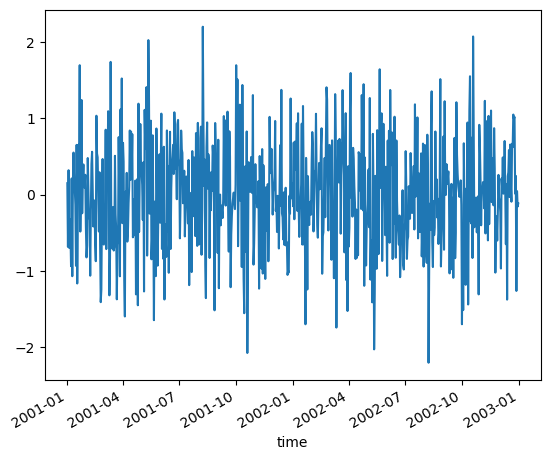

In [8]:
data_declim.plot()

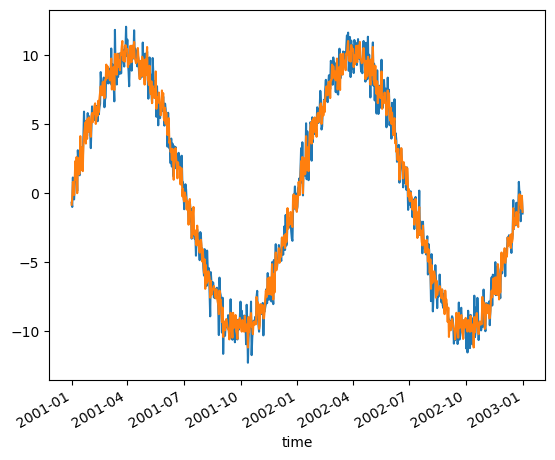

In [9]:
data.plot()
data_clim_rep.plot()

<Axes: xlabel='time'>

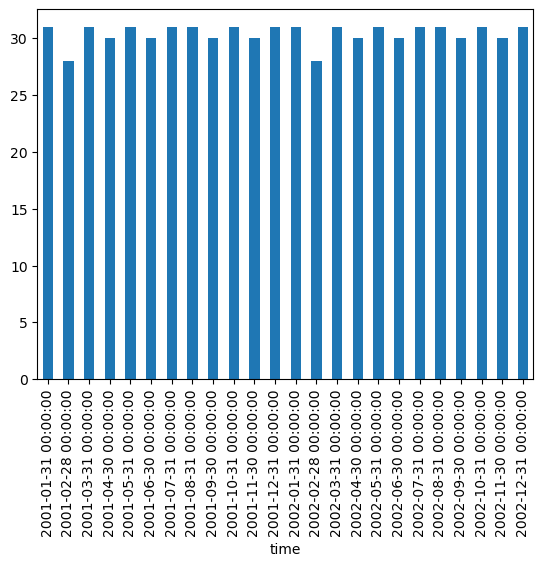

In [10]:
data.resample(time="1M").count().to_pandas().plot.bar()

In [11]:
data.groupby?

Signature:
data.groupby(
    group: 'Hashable | DataArray | IndexVariable',
    squeeze: 'bool' = True,
    restore_coord_dims: 'bool' = False,
) -> 'DataArrayGroupBy'
Docstring:
Returns a DataArrayGroupBy object for performing grouped operations.

Parameters
----------
group : Hashable, DataArray or IndexVariable
    Array whose unique values should be used to group this array. If a
    Hashable, must be the name of a coordinate contained in this dataarray.
squeeze : bool, default: True
    If "group" is a dimension of any arrays in this dataset, `squeeze`
    controls whether the subarrays have a dimension of length 1 along
    that dimension or if the dimension is squeezed out.
restore_coord_dims : bool, default: False
    If True, also restore the dimension order of multi-dimensional
    coordinates.

Returns
-------
grouped : DataArrayGroupBy
    A `DataArrayGroupBy` object patterned after `pandas.GroupBy` that can be
    iterated over in the form of `(unique_value, grouped_array)

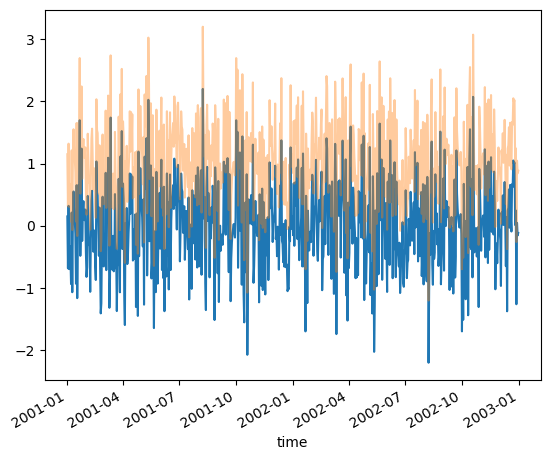

In [12]:
(data.groupby("time.dayofyear") - data.groupby("time.dayofyear").mean("time")).plot()
(1 + data_declim).plot(alpha=0.4)